In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [5]:
selected_cell = 'Hepatic_Stellate_Cells'

In [6]:
estimation = pd.read_csv('Non-immune.csv',index_col=0)
estimation.head()

,Central_venous_LSECs,Cholangiocytes,Other,Hepatocyte,Portal_endothelial_Cells,Periportal_LSECs,Hepatic_Stellate_Cells,Erythroid_Cells,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,
TCGA-FV-A495-01,0.048208,0.082348,0.229907,0.513951,0.052193,0.028028,0.026566,0.018798,0,0.936357,0.374260
TCGA-G3-A3CH-11,0.072365,0.057291,0.059977,0.762034,0.002508,0.010815,0.009797,0.025213,0,0.891445,0.490836
TCGA-CC-A3MB-01,0.105460,0.105947,0.306659,0.400480,0.010965,0.018600,0.015033,0.036854,0,0.927513,0.428470
TCGA-BC-A3KF-01,0.095423,0.057982,0.197635,0.585538,0.023488,0.000000,0.005508,0.034425,0,0.893156,0.452923
TCGA-DD-A4NV-01,0.095317,0.013995,0.147109,0.657518,0.026562,0.017952,0.020608,0.020940,0,0.906726,0.426207


In [7]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [8]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [9]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [10]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Central_venous_LSECs,Cholangiocytes,Other,Hepatocyte,Portal_endothelial_Cells,Periportal_LSECs,Hepatic_Stellate_Cells,Erythroid_Cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.048208,0.082348,0.229907,0.513951,0.052193,0.028028,0.026566,0.018798,0,0.936357,0.374260,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.105460,0.105947,0.306659,0.400480,0.010965,0.018600,0.015033,0.036854,0,0.927513,0.428470,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.095423,0.057982,0.197635,0.585538,0.023488,0.000000,0.005508,0.034425,0,0.893156,0.452923,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.095317,0.013995,0.147109,0.657518,0.026562,0.017952,0.020608,0.020940,0,0.906726,0.426207,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.089460,0.017993,0.329526,0.404147,0.035101,0.069184,0.026817,0.027771,0,0.717692,0.710705,409.0,0.0,False,13.633333


In [11]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Central_venous_LSECs,Cholangiocytes,Other,Hepatocyte,Portal_endothelial_Cells,Periportal_LSECs,Hepatic_Stellate_Cells,Erythroid_Cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-DD-A3A6-01,0.060229,0.000000,0.396414,0.000000,0.126560,0.232675,0.144611,0.039511,0,0.374246,0.932646,3258.0,0.0,False,108.600000
TCGA-CC-A9FV-01,0.155511,0.000757,0.593878,0.000000,0.023615,0.126226,0.084299,0.015714,0,0.637344,0.879414,0.0,0.0,False,0.000000
TCGA-CC-A7IJ-01,0.091640,0.000000,0.676781,0.000000,0.041950,0.088274,0.076757,0.024599,0,0.695290,0.872185,382.0,0.0,False,12.733333
TCGA-CC-A3M9-01,0.126218,0.006182,0.777386,0.000000,0.004862,0.000000,0.075703,0.009648,0,0.720885,0.866412,219.0,1.0,True,7.300000
TCGA-CC-A3MA-01,0.104227,0.176718,0.539471,0.037339,0.004413,0.050024,0.067602,0.020205,0,0.787388,0.700754,261.0,1.0,True,8.700000


In [16]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [17]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

278

In [18]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.0043029869220923

In [19]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.11653

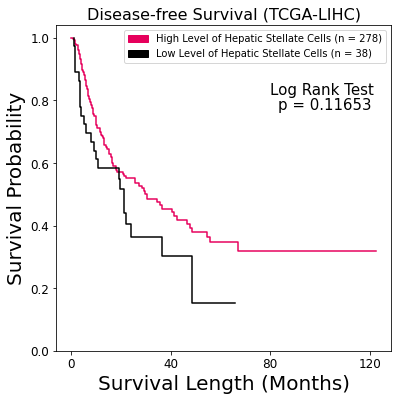

In [21]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Hepatic Stellate Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Hepatic Stellate Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [22]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [23]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Central_venous_LSECs,Cholangiocytes,Other,Hepatocyte,Portal_endothelial_Cells,Periportal_LSECs,Hepatic_Stellate_Cells,Erythroid_Cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.048208,0.082348,0.229907,0.513951,0.052193,0.028028,0.026566,0.018798,0,0.936357,0.374260,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.105460,0.105947,0.306659,0.400480,0.010965,0.018600,0.015033,0.036854,0,0.927513,0.428470,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.095423,0.057982,0.197635,0.585538,0.023488,0.000000,0.005508,0.034425,0,0.893156,0.452923,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.095317,0.013995,0.147109,0.657518,0.026562,0.017952,0.020608,0.020940,0,0.906726,0.426207,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.072179,0.021915,0.718695,0.009198,0.094734,0.030957,0.034111,0.018211,0,0.769953,0.865544,101.0,1,True,3.366667


In [24]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Central_venous_LSECs,Cholangiocytes,Other,Hepatocyte,Portal_endothelial_Cells,Periportal_LSECs,Hepatic_Stellate_Cells,Erythroid_Cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-DD-A3A6-01,0.060229,0.000000,0.396414,0.000000,0.126560,0.232675,0.144611,0.039511,0,0.374246,0.932646,3258.0,1,True,108.600000
TCGA-CC-A9FV-01,0.155511,0.000757,0.593878,0.000000,0.023615,0.126226,0.084299,0.015714,0,0.637344,0.879414,0.0,0,False,0.000000
TCGA-CC-A7IJ-01,0.091640,0.000000,0.676781,0.000000,0.041950,0.088274,0.076757,0.024599,0,0.695290,0.872185,382.0,0,False,12.733333
TCGA-CC-A3M9-01,0.126218,0.006182,0.777386,0.000000,0.004862,0.000000,0.075703,0.009648,0,0.720885,0.866412,300.0,1,True,10.000000
TCGA-CC-A3MA-01,0.104227,0.176718,0.539471,0.037339,0.004413,0.050024,0.067602,0.020205,0,0.787388,0.700754,303.0,1,True,10.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DD-AADG-01,0.036736,0.000000,0.224305,0.694417,0.006121,0.018376,0.001229,0.018816,0,0.809667,0.593603,1145.0,0,False,38.166667
TCGA-DD-A73E-01,0.050322,0.027474,0.252322,0.580787,0.040769,0.000000,0.000847,0.047480,0,0.856428,0.520231,44.0,0,False,1.466667
TCGA-G3-A6UC-01,0.034367,0.014651,0.122901,0.778047,0.018276,0.000000,0.000133,0.031625,0,0.922092,0.403236,671.0,0,False,22.366667
TCGA-ZP-A9D4-01,0.040183,0.000000,0.242052,0.653385,0.040651,0.000474,0.000000,0.023254,0,0.854033,0.521920,395.0,0,False,13.166667


In [25]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [26]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

335

In [27]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.00407568575834192

In [28]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.09802

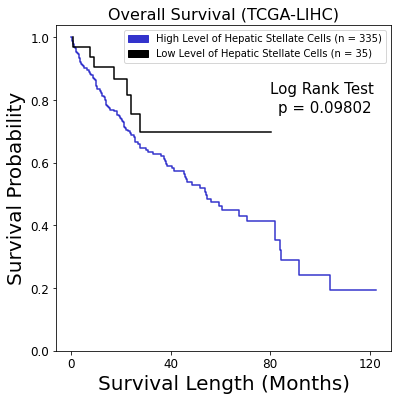

In [30]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Hepatic Stellate Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Hepatic Stellate Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [31]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

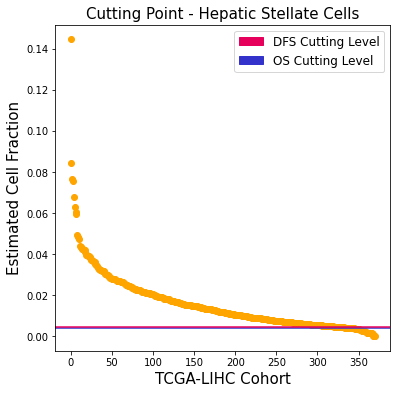

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - Hepatic Stellate Cells',fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
#plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')